<h1><center>DataScience Tackling Heart Diseases !</center></h1>
<img src="https://cdn.dnaindia.com/sites/default/files/styles/full/public/2018/09/25/735506-heart-disease.jpg" alt="drawing" width="600" height="400"/>

# Another CVDs Dataset !
So, We have one more Dataset related to Heart Diseases. We tackled similar kind of problem in our [Previous Kernel](https://www.kaggle.com/rahulgulia/data-science-and-cardiovascular-diseases-cvds) based on Cardiovascular Disease Dataset provided by [Svetlana Ulianova](https://www.kaggle.com/sulianova). <br><br>
This time we have Heart Disease UCI Dataset but after going through some discussion forms for this dataset, I realized this dataset is quite different to the [Original Dataset](https://archive.ics.uci.edu/ml/datasets/heart+Disease) without updating necessary changes in the dataset description for some unknown reasons. <br><br>
Keeping above issue in the mind, We will be following this [Discussion Form](https://www.kaggle.com/ronitf/heart-disease-uci/discussion/105877) as our reference for our features in this Kernel. A small shoutout to our Saviour [IntiPic](https://www.kaggle.com/intipic). <br><br>
I'll be revising some points I mentioned in my [Previous Kernel](https://www.kaggle.com/rahulgulia/data-science-and-cardiovascular-diseases-cvds), following the similar kind of pipeline<br><br>
By the way, if you're wondering why I used this specific pic in the title then it's because this pic reminded me of my favourite character Walter White from Breaking Bad series :D !<br><br>

<center><img src="https://i.insider.com/5dade9bc045a3139e8686c33?width=1300&format=jpeg&auto=webp" alt="drawing" width="600" height="400"/></center><br>


Keeping all jokes apart, Let's get it started !


# Importing Necessary Libaraies

In [1]:
import warnings
warnings.simplefilter('ignore')

import os#Walking through directores

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import missingno as msno # Visualizing Missing Value
from plotly.subplots import make_subplots #To Create Subplots



import seaborn as sns # stastical graphs 
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
colors = ['rgb(240,128,128)', 'rgb(102,205,170)', 'rgb(0,206,209)']  #used for markers
import plotly.graph_objects as go # Generate Graphs


from sklearn.preprocessing import MinMaxScaler # Scaling Purpose

from sklearn.neighbors import KNeighborsClassifier #KNN Model
from sklearn.ensemble import RandomForestClassifier #RandomForest Model
from sklearn.linear_model import LogisticRegression #Logistic Model

from sklearn.model_selection import train_test_split # Splitting into train and test

from sklearn.model_selection import GridSearchCV# Hyperparameter Tuning
from sklearn.model_selection import cross_val_score#cross validation score

from sklearn.metrics import classification_report # text report showing the main classification metrics
from sklearn.metrics import confusion_matrix #to get confusion_matirx 

Let's Dive into our CSV File to get a glance of what we are dealing with ...

In [2]:
missing_values = ['?', '--', ' ', 'NA', 'N/A', '-'] #Sometimes Missing Values are't in form of NaN
df = pd.read_csv('../input/heart-disease-uci/heart.csv', delimiter = ',', na_values = missing_values)
print('There are Total {} datapoints in the dataset with {} Features listed as {}:'.format(df.shape[0], df.shape[1], df.columns.values))

There are Total 303 datapoints in the dataset with 14 Features listed as ['age' 'sex' 'cp' 'trestbps' 'chol' 'fbs' 'restecg' 'thalach' 'exang'
 'oldpeak' 'slope' 'ca' 'thal' 'target']:


>So, this Dataset contains the following Features :
* age :> Age of the Patient in Years
* sex :> Gender of the Patient
* cp :> Chest Pain Type
* trestbps :> Resting Blood Pressure in mm Hg
* chol :> Serum Cholestoral in mg/dl (Measurement of certain elements in the blood)
* fbs :> Fasting Blood Sugar Lower than 100 mg/dL is Normal, 100 mg/dL - 125 mg/dL is considered prediabetes. 125 mg/dL + is cosidered to have Diabetes
* restecg :> Resting Electrocardiographic Results (Test that measures the Electrical Activity of the Heart)
* thalach :> Maximum Heart Rate achieved during Thalium Stress Test
* exang :> Exercise induced angina (yes or no)
* oldpeak :> ST depression induced by exercise relative to rest
* slope :> Slope of peak exercise ST segment 
* ca :> Number of major vessels colored by Fluoroscopy
* thal :> Thalium Stress Test result
* target :> Target Value (Patient having Heart Disease or Not)

Before futher proceeding with our analysis, let's correct some mistakes as mentioned in the [Discussion Form](https://www.kaggle.com/ronitf/heart-disease-uci/discussion/105877) <br>
Quoting from the discussion form :
> * Mistake 1 : data 93, 139, 164, 165 and 252 have ca=4 which is incorrect. In the original Cleveland dataset they are NaNs (so they should be removed)
> * Mistake 2 : data 49 and 282 have thal = 0, also incorrect. They are also NaNs in the original dataset.
> * Mistake 3 : Our Target Values are swapped i.e. 0 : Heart Disease and 1 : No Heart Disease

## Dealing with Mistake 1
> * It's even mentioned in the dataset that value of 'ca' ranges from 0-3. So, clearly value 4 represents and error

In [3]:
df[df['ca']==4]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
92,52,1,2,138,223,0,1,169,0,0.0,2,4,2,1
158,58,1,1,125,220,0,1,144,0,0.4,1,4,3,1
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
251,43,1,0,132,247,1,0,143,1,0.1,1,4,3,0


In [4]:
df.loc[df['ca']==4, 'ca'] = np.NaN

## Dealing with Mistake 2

> * Data 49 and 282 have thal = 0, also incorrect. They are also NaNs in the original dataset.

In [5]:
df.loc[48, 'thal'] = np.NaN
df.loc[281, 'thal'] = np.NaN

Now, We can move to our analysis..

# Data Analysis


<img  src="https://miro.medium.com/max/1400/1*PKXC0FeXQc5LVmqhJ8HnVg.png" alt="FDR" width="600" height="400"/>


>In our Data Analysis, We will try to analyze to find out the below stuffs :
* Missing / Duplicate Values 
* Find all the Continuous Features
* Handling Outliers if Any
* Distribution of the Continuous Features
* Find all the Discrete Features
* Cardinality of Discrete Features
* Relation with Independent and Dependent Features

## Missing / Duplicate Values

In [6]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0.0,1.0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0.0,2.0,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0.0,2.0,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0.0,2.0,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0.0,2.0,1


In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          5
thal        2
target      0
dtype: int64

We have dataset free of Null values (expect the one we introduced) <br>
Though We can use tradational way of visualizing Missing Values by making a heatmap, but i came across a new library and just to introduce that to everyone, we'll gonna use that ...

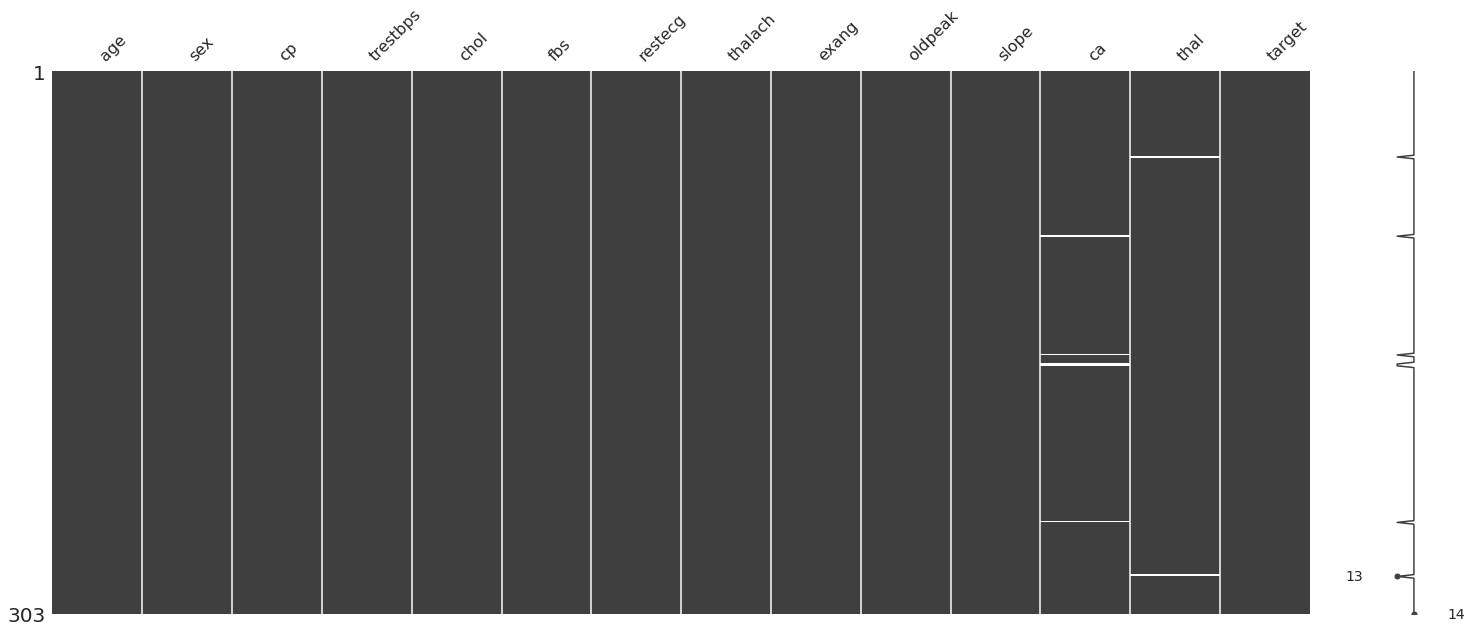

In [8]:
msno.matrix(df)

As shown by Horizontal lines, We have 5 and 2 null values in ca and thal feature respectively. <br><br>
We'll gonna handle them in our Feature Engineering Section. Now let's move further..

In [9]:
duplicate_sum = df.duplicated().sum()
if duplicate_sum:
    print('Duplicates Rows in Dataset are : {}'.format(duplicate_sum))
else:
    print('Dataset contains no Duplicate Values')

Duplicates Rows in Dataset are : 1


In [10]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0.0,1.0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0.0,2.0,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0.0,2.0,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0.0,2.0,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0.0,3.0,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0.0,3.0,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2.0,3.0,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1.0,3.0,0


In [11]:
duplicated = df[df.duplicated(keep=False)]
duplicated.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
163,38,1,2,138,175,0,1,173,0,0.0,2,NaN,2.0,1
164,38,1,2,138,175,0,1,173,0,0.0,2,NaN,2.0,1


Hey Mr. Duplicate ! Found you :) 

In [12]:
df.drop_duplicates(keep = 'first', inplace = True)
print('Total {} datapoints remaining with {} features'.format(df.shape[0], df.shape[1]))

Total 302 datapoints remaining with 14 features


## Continuous Features

Well, You know my drill :)

In [13]:
Continuous_features = [feature for feature in df.columns if len(df[feature].unique())>25]
print('Continuous Values are : {}'.format(Continuous_features))

Continuous Values are : ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


In [14]:
df[Continuous_features].head()

,age,trestbps,chol,thalach,oldpeak
0,63,145,233,150,2.3
1,37,130,250,187,3.5
2,41,130,204,172,1.4
3,56,120,236,178,0.8
4,57,120,354,163,0.6


Time to get some stastical stuffs

In [15]:
df[Continuous_features].describe()

,age,trestbps,chol,thalach,oldpeak
count,302.00000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,131.602649,246.500000,149.569536,1.043046
std,9.04797,17.563394,51.753489,22.903527,1.161452
min,29.00000,94.000000,126.000000,71.000000,0.000000
25%,48.00000,120.000000,211.000000,133.250000,0.000000
50%,55.50000,130.000000,240.500000,152.500000,0.800000
75%,61.00000,140.000000,274.750000,166.000000,1.600000
max,77.00000,200.000000,564.000000,202.000000,6.200000


With such a big difference between 75% percentile and max value, and 25% percentile and min value, We do possibly observe some outliers in 'trestbps', 'chol', 'thalach', 'oldpeak'

## Outliers ? Ah Shit, Here We go again ..


<img  src="https://pbs.twimg.com/media/EDANCjJXkAAOSjO.jpg" alt="FDR" width="600" height="400"/>


I've talked about Outliers much in details in my [Previous Kernel](https://www.kaggle.com/rahulgulia/data-science-and-cardiovascular-diseases-cvds). You can have a look if you're looking for more info. <br>
In short, just remember Outliers are just the values that differs significantly from other observations 

Time for some Box Plot bois ..

In [16]:
fig = go.Figure()

fig.add_trace(go.Box(x=df['age'], name = 'age', boxpoints='outliers'))
fig.add_trace(go.Box(x=df['trestbps'], name = 'trestbps', boxpoints='outliers'))
fig.add_trace(go.Box(x=df['chol'], name = 'chol', boxpoints='outliers'))
fig.add_trace(go.Box(x=df['thalach'], name = 'thalach', boxpoints='outliers'))
fig.add_trace(go.Box(x=df['oldpeak'], name = 'oldpeak', boxpoints='outliers'))

fig.update_layout(title_text="Box Plot for Continuous features with Outliers")
fig.show()

That's not fair. We can hardly observe 'oldpeak' :/

In [17]:
fig = go.Figure()
fig.add_trace(go.Box(x=df['oldpeak'], name = 'oldpeak', boxpoints='outliers'))

fig.update_layout(title_text="Box Plot for oldpeak with Outliers")
fig.show()

> * Our Age doesn't contain Outliers. I'm proud of you man :)
> * Though We observe some outliers in our remaining Continuous features

<img  src="https://media.makeameme.org/created/heisenberg-approves-knhd1a.jpg" alt="FDR" width="600" height="400"/>

In [18]:
def outliers(df_out, drop = False):
    for each_feature in df_out.columns:
        feature_data = df_out[each_feature]
        Q1 = np.percentile(feature_data, 25.) # 25th percentile of the data of the given feature
        Q3 = np.percentile(feature_data, 75.) # 75th percentile of the data of the given feature
        IQR = Q3-Q1 #Interquartile Range
        outlier_step = IQR * 1.5 #That's we were talking about above
        outliers = feature_data[~((feature_data >= Q1 - outlier_step) & (feature_data <= Q3 + outlier_step))].index.tolist()  
        if not drop:
            print('For the feature {}, No of Outliers is {}'.format(each_feature, len(outliers)))
        if drop:
            df.drop(outliers, inplace = True, errors = 'ignore')
            print('Outliers from {} feature removed'.format(each_feature))

In [19]:
outliers(df[Continuous_features])

For the feature age, No of Outliers is 0
For the feature trestbps, No of Outliers is 9
For the feature chol, No of Outliers is 5
For the feature thalach, No of Outliers is 1
For the feature oldpeak, No of Outliers is 5


Since excluding outliers can cause your results to become statistically significant, We'll gonna drop our datapoints with Outliers

In [20]:
outliers(df[Continuous_features], drop = True)

Outliers from age feature removed
Outliers from trestbps feature removed
Outliers from chol feature removed
Outliers from thalach feature removed
Outliers from oldpeak feature removed


We are free from these Outliers now. <br>
Time for Some EDA Stuffs 

In [21]:
 df[Continuous_features].head()

,age,trestbps,chol,thalach,oldpeak
0,63,145,233,150,2.3
1,37,130,250,187,3.5
2,41,130,204,172,1.4
3,56,120,236,178,0.8
4,57,120,354,163,0.6


## Age Distribution

In [22]:
fig = go.Figure(data=[go.Bar(x = df[df['target'] == 0]['age'].value_counts().index.to_list(), 
                             y =df[df['target'] == 0]['age'].value_counts().values, name = 'Heart Disease'),
                      go.Bar(x = df[df['target'] == 1]['age'].value_counts().index.to_list(), 
                             y =df[df['target'] == 1]['age'].value_counts().values, name = 'No Heart Disease')]
               )

fig.update_layout(barmode='group', xaxis_tickangle=-45,title_text="Fequency of Age groups grouped by Target Value", 
                  yaxis=dict(
        title='Total Count',
        titlefont_size=16,
        tickfont_size=14,
    ),     xaxis=dict(
        title='Age',
        titlefont_size=16,
        tickfont_size=14,
    ))
fig.show()

In [23]:
fig = go.Figure()
fig.add_trace(go.Violin(y=df['age'][df['target'] == 0], box_visible=True, line_color='lightseagreen',
                               fillcolor='lightseagreen', opacity=0.6,points="all",
                               legendgroup='Heart Disease', scalegroup='Heart Disease', name='Heart Disease',side='negative',x0='Age'))

fig.add_trace(go.Violin(y=df['age'][df['target'] == 1], box_visible=True, line_color='indigo',
                               fillcolor='indigo', opacity=0.6,points="all",
                               legendgroup='No Heart Disease', scalegroup='No Heart Disease', name='No Heart Disease',side='positive',x0='Age'))

fig.update_layout(yaxis_zeroline=False, title_text="Age Distribution grouped by Target Variable",)

fig.show()

Age is showing an expected pattern :
> * Younger age group are less prone to Older age group
> * Age group between 41 and 54 are less prone to Heart Diseases
> * Age group between 57 and 63 shows a stong relation with the case of suffering from Heart Diseases


## trestbps Distribution

trestbps or you can say Resting Blood Pressure is the ratio of Systolic and Diastolic Pressure in Resting State

In [24]:
fig = go.Figure(data=[go.Bar(x = df[df['target'] == 0]['trestbps'].value_counts().index.to_list(), 
                             y =df[df['target'] == 0]['trestbps'].value_counts().values, name = 'Heart Disease'),
                      go.Bar(x = df[df['target'] == 1]['trestbps'].value_counts().index.to_list(), 
                             y =df[df['target'] == 1]['trestbps'].value_counts().values, name = 'No Heart Disease')]
               )

fig.update_layout(barmode='group', xaxis_tickangle=-45,title_text="Fequency of Resting Blood Pressure grouped by Target Value", 
                  yaxis=dict(
        title='Total Count',
        titlefont_size=16,
        tickfont_size=14,
    ),     xaxis=dict(
        title='Resting Blood Pressure ',
        titlefont_size=16,
        tickfont_size=14,
    ))
fig.show()

In [25]:
fig = make_subplots(rows=1, cols=2,subplot_titles=("Heart Disease", "No Heart Disease"), specs=[[{'type':'domain'}, {'type':'domain'}]])

fig.add_trace(go.Pie(labels=df[df['target'] == 0]['trestbps'].value_counts().index.to_list(),values=df[df['target'] ==0]['trestbps'].value_counts().values, hovertemplate = "RPV: %{label} <br>Popularity: %{percent}</br>" ,showlegend=False,  name = 'Heart Disease'), 1, 1)
fig.add_trace(go.Pie(labels=df[df['target'] == 1]['trestbps'].value_counts().index.to_list(),values=df[df['target'] ==1]['trestbps'].value_counts().values, hovertemplate = "RPV: %{label} <br>Popularity: %{percent}</br>" ,showlegend=False,  name = 'No Heart Disease'), 1, 2)

fig.data[0].marker.line.color = 'rgb(255, 255, 255)'
fig.data[0].marker.line.width = 2

fig.data[1].marker.line.color = 'rgb(255, 255, 255)'
fig.data[1].marker.line.width = 2

fig.update_traces(hole=.4,)
fig.update_layout(title_text="Distribution of Resting Blood Pressure",title_x=0.5, title_y = 1)

fig.show()

> * We have good quantity of people having 120 and 130 Resting blood Pressure, followed by 140 and 110 

## chol Distribution

A Serum Cholesterol Level is a measurement of certain elements in the blood, including the amount of high- and low-density lipoprotein cholesterol (HDL and LDL) in a person’s blood.



| Type    |      Level      |
|----------|:-------------:|
| Healthy Serum Cholesterol |  Less than 200 mg/dL |
| Healthy LDL Cholesterol |  Less than 130 mg/dL |
| Healthy HDL Cholesterol |    Higher than 55 mg/dL for Women and 45 mg/dL for Men   |
| Healthy Triglycerides | Less than 150 mg/dL |

In [26]:
fig = go.Figure()
fig.add_trace(go.Violin(y=df['chol'][df['target'] == 0], box_visible=True, line_color='lightseagreen',
                               fillcolor='lightseagreen', opacity=0.6,points="all",
                               legendgroup='Heart Disease', scalegroup='Heart Disease', name='Heart Disease',side='negative',x0=' Serum Cholesterol Level'))

fig.add_trace(go.Violin(y=df['chol'][df['target'] == 1], box_visible=True, line_color='indigo',
                               fillcolor='indigo', opacity=0.6,points="all",
                               legendgroup='No Heart Disease', scalegroup='No Heart Disease', name='No Heart Disease',side='positive',x0=' Serum Cholesterol Level'))

fig.update_layout(yaxis_zeroline=False, title_text=" Serum Cholesterol Level Distribution grouped by Target Variable",)

fig.show()

## thalach Distribution

Maximum Heart Rate achieved during Thalium Stress Test <br>
Your target heart rate during a stress test depends on your age. For adults, the maximum predicted heart rate is 220 minus your age. So, if you're 40 years old, the maximum predicted heart rate is 220 – 40 = 180

In [27]:
fig = go.Figure(data=[go.Bar(x = df[df['target'] == 0]['thalach'].value_counts().index.to_list(), 
                             y =df[df['target'] == 0]['thalach'].value_counts().values, name = 'Heart Disease'),
                      go.Bar(x = df[df['target'] == 1]['thalach'].value_counts().index.to_list(), 
                             y =df[df['target'] == 1]['thalach'].value_counts().values, name = 'No Heart Disease')]
               )

fig.update_layout(barmode='group', xaxis_tickangle=-45,title_text="Fequency of Maximum Heart Rate achieved during Thalium Stress Test grouped by Target Value", 
                  yaxis=dict(
        title='Total Count',
        titlefont_size=16,
        tickfont_size=14,
    ),     xaxis=dict(
        title='Maximum Heart Rate achieved during Thalium Stress Test ',
        titlefont_size=16,
        tickfont_size=14,
    ))
fig.show()

In [28]:
fig = go.Figure()
fig.add_trace(go.Violin(y=df['thalach'][df['target'] == 0], box_visible=True, line_color='lightseagreen',
                               fillcolor='lightseagreen', opacity=0.6,points="all",
                               legendgroup='Heart Disease', scalegroup='Heart Disease', name='Heart Disease',side='negative',x0=' Maximum Heart Rate achieved during Thalium Stress Test'))

fig.add_trace(go.Violin(y=df['thalach'][df['target'] == 1], box_visible=True, line_color='indigo',
                               fillcolor='indigo', opacity=0.6,points="all",
                               legendgroup='No Heart Disease', scalegroup='No Heart Disease', name='No Heart Disease',side='positive',x0=' Maximum Heart Rate achieved during Thalium Stress Test'))

fig.update_layout(yaxis_zeroline=False, title_text="Distribution for Maximum Heart Rate achieved during Thalium Stress Test grouped by Target Variable",)

fig.show()

> * We can observe a mild seperation in the spread between Heart Disease and No Heart Disease caused by Maximum Heart Rate achieved during Thalium Stress Test 
> * Patient with higher value of Maximum Heart Rate achieved during Thalium Stress Test are less prone to Heart Diseases as compared to Heart Disease Cases

## oldpeak Distribuition

ST depression induced by exercise relative to rest

In [29]:
fig = go.Figure(data=[go.Bar(x = df[df['target'] == 0]['oldpeak'].value_counts().index.to_list(), 
                             y =df[df['target'] == 0]['oldpeak'].value_counts().values, name = 'Heart Disease'),
                      go.Bar(x = df[df['target'] == 1]['oldpeak'].value_counts().index.to_list(), 
                             y =df[df['target'] == 1]['oldpeak'].value_counts().values, name = 'No Heart Disease')]
               )

fig.update_layout(barmode='group', xaxis_tickangle=-45,title_text="ST depression Level Distribution grouped by Target Value", 
                  yaxis=dict(
        title='Total Count',
        titlefont_size=16,
        tickfont_size=14,
    ),     xaxis=dict(
        title='ST depression Level',
        titlefont_size=16,
        tickfont_size=14,
    ))
fig.show()

In [30]:
fig = go.Figure()
fig.add_trace(go.Violin(y=df['oldpeak'][df['target'] == 0], box_visible=True, line_color='lightseagreen',
                               fillcolor='lightseagreen', opacity=0.6,points="all",
                               legendgroup='Heart Disease', scalegroup='Heart Disease', name='Heart Disease',side='negative',x0='ST depression Level'))

fig.add_trace(go.Violin(y=df['oldpeak'][df['target'] == 1], box_visible=True, line_color='indigo',
                               fillcolor='indigo', opacity=0.6,points="all",
                               legendgroup='No Heart Disease', scalegroup='No Heart Disease', name='No Heart Disease',side='positive',x0='ST depression Level'))

fig.update_layout(yaxis_zeroline=False, title_text="ST depression Level Distribution grouped by Target Variable",)

fig.show()

> * We have max number of cases with ST depression level with 0.0, dominated by No Heart Disease Cases 
> * With maximum spread of No Heart Disease Cases densed around 0.0 to 1.0, We can observe a sparse spread for Heart Disease Cases around 0.4 to 2.25

In [31]:
Continuous_features.append('target')

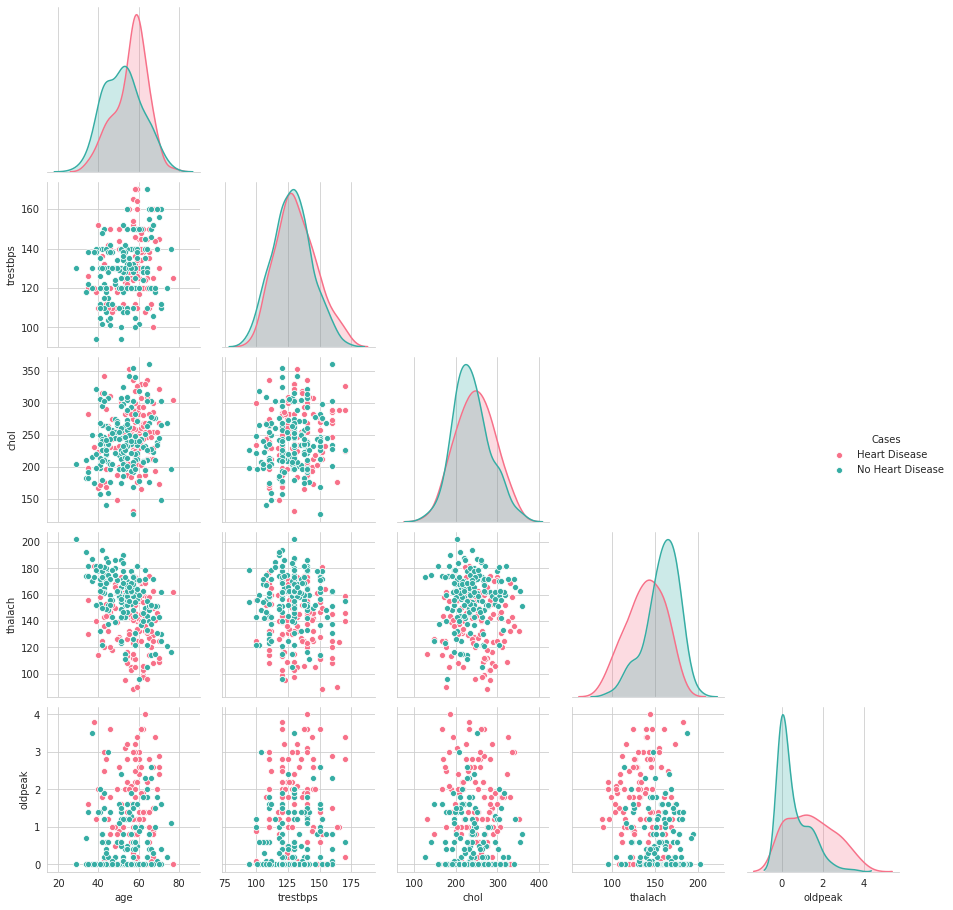

In [32]:
g = sns.pairplot(df[Continuous_features], kind='scatter',hue='target', palette="husl", corner=True)

g._legend.set_title('Cases')
new_labels = ['Heart Disease', 'No Heart Disease']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

plt.show()

> * oldpeak feautre form quite a linear seperatable relation with the remaining continuous features for Heart and No Heart Disease Cases
> * While thalach forms mild seperation, other features doesn't form any clear seperation

## Categorial Features

In [33]:
Categorial_features = [feature for feature in df.columns if len(df[feature].unique())<=25]
print('Continuous Values are : {}'.format(Categorial_features))

Continuous Values are : ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']


In [34]:
for each_feature in Categorial_features:
    print('No of Categorial Values in Feature {} is {} as {}'.format(each_feature, len(df[each_feature].unique()), df[each_feature].unique()))

No of Categorial Values in Feature sex is 2 as [1 0]
No of Categorial Values in Feature cp is 4 as [3 2 1 0]
No of Categorial Values in Feature fbs is 2 as [1 0]
No of Categorial Values in Feature restecg is 3 as [0 1 2]
No of Categorial Values in Feature exang is 2 as [0 1]
No of Categorial Values in Feature slope is 3 as [0 2 1]
No of Categorial Values in Feature ca is 5 as [ 0.  2.  1.  3. nan]
No of Categorial Values in Feature thal is 4 as [ 1.  2.  3. nan]
No of Categorial Values in Feature target is 2 as [1 0]


After going through the description provided by the Distributer, Following information is gathered :
> * sex (gender): 2 Categorial Values { 1 : Male, 0 : Female )
> * cp (Chest Pain Type): 4 Categorial Values { 0 : asymptomatic, 1 : atypical angina, 2 : non-anginal pain, 3 : typical angina  )
> * fbs (Fasting Blood Sugar): 2 Categorial Values { 1 : true if fbs greater than 120 mg/dl, 0 : false}
> * restecg (Resting Electrocardiographic Results): 3 Categorial Values { 0 : showing probable or definite left ventricular hypertrophy, 1 : normal, 2 : having ST-T wave abnormality
> * exang (Exercise induced angina): 2 Categorial Values { 1 : yes, 0 : no }
> * slope (Slope of peak exercise ST segment): 3 Categorial Values { 0 : downsloping, 1 : flat, 2 : upsloping }
> * ca (Number of major vessels colored by Fluoroscopy):  4 Categorial Values ranging from 0 - 3
> * thal (Thalium Stress Test result): 3 Categorial Values { 1 : fixed defect, 2 : normal, 3 :  reversable defect }
> * target (Target Feature): 2 Categorial Values { 1 : No Heart Disease, 0 : Heart Disease }

In [35]:

fig = go.Figure([go.Pie(labels=['No Heart Disease', 'Heart Disease'],values=df['target'].value_counts().values,hovertemplate = '<br>Type: %{label}</br>Count: %{value}<br>Popularity: %{percent}</br>', name = '', marker_colors = colors)])
fig.update_layout(title_text="Pie chart of Target Variable", template="plotly_white")
fig.data[0].marker.line.color = 'rgb(255, 255, 255)'
fig.data[0].marker.line.width = 2
fig.update_traces(hole=.4,)
fig.show()

Well, We are blessed with a balanced dataset :)


<img  src="https://scontent.fdel25-1.fna.fbcdn.net/v/t1.0-9/48391658_625132244607946_7405943289678921728_n.png?_nc_cat=109&_nc_sid=730e14&_nc_ohc=rTg1qpGq8tMAX_hkJ7h&_nc_ht=scontent.fdel25-1.fna&oh=96e5ed6a028415dfe2dc5d17704c790d&oe=5EF44D22" alt="FDR" width="600" height="400"/>


We'll gonna explore about distribution of our Categorial Features based on the Target Variable.

In [36]:
fig = make_subplots(rows=1, cols=2,subplot_titles=("Heart Disease", "No Heart Disease"), specs=[[{'type':'domain'}, {'type':'domain'}]])


colors = ['rgb(240,128,128)', 'rgb(102,205,170)', 'rgb(0,206,209)'] 

fig.add_trace(go.Pie(labels=df[df['target'] == 0]['sex'].value_counts().index.to_list(),values=df[df['target'] ==0]['sex'].value_counts().values ,showlegend=False,  name = 'Heart Disease', customdata=['Male', 'Female'], hovertemplate = '%{customdata} <br>Count: %{value}</br>Popularity: %{percent}</br>', marker_colors = colors), 1, 1)
fig.add_trace(go.Pie(labels=df[df['target'] == 1]['sex'].value_counts().index.to_list(),values=df[df['target'] ==1]['sex'].value_counts().values ,showlegend=False,  name = 'No Heart Disease', customdata=['Male', 'Female'], hovertemplate = '%{customdata} <br>Count: %{value}</br>Popularity: %{percent}'), 1, 2)

fig.data[0].marker.line.color = 'rgb(255, 255, 255)'
fig.data[0].marker.line.width = 2

fig.data[1].marker.line.color = 'rgb(255, 255, 255)'
fig.data[1].marker.line.width = 2

fig.update_traces(hole=.4)

fig.update_layout(title_text="Distribution of Sex grouped by Target Feature",title_x=0.5, title_y = 1)

fig.show()

In [37]:
fig = make_subplots(rows=1, cols=2,subplot_titles=("Heart Disease", "No Heart Disease"), specs=[[{'type':'domain'}, {'type':'domain'}]])


colors = ['rgb(240,128,128)', 'rgb(102,205,170)', 'rgb(0,206,209)'] 

fig.add_trace(go.Pie(labels=df[df['target'] == 0]['cp'].value_counts().index.to_list(),values=df[df['target'] ==0]['cp'].value_counts().values ,showlegend=False,  name = 'Heart Disease', customdata=['Asymptomatic', 'Non-Anginal Pain', 'Atypical Angina', 'Typical Angina'], hovertemplate = '%{customdata} <br>Count: %{value}</br>Popularity: %{percent}</br>', marker_colors = colors), 1, 1)
fig.add_trace(go.Pie(labels=df[df['target'] == 1]['cp'].value_counts().index.to_list(),values=df[df['target'] ==1]['cp'].value_counts().values ,showlegend=False,  name = 'No Heart Disease', customdata=['Asymptomatic', 'Non-Anginal Pain', 'Atypical Angina', 'Typical Angina'], hovertemplate = '%{customdata} <br>Count: %{value}</br>Popularity: %{percent}'), 1, 2)

fig.data[0].marker.line.color = 'rgb(255, 255, 255)'
fig.data[0].marker.line.width = 2

fig.data[1].marker.line.color = 'rgb(255, 255, 255)'
fig.data[1].marker.line.width = 2

fig.update_traces(hole=.4)

fig.update_layout(title_text="Distribution of Chest Pain Type grouped by Target Feature",title_x=0.5)

fig.show()

In [38]:
fig = make_subplots(rows=1, cols=2,subplot_titles=("Heart Disease", "No Heart Disease"), specs=[[{'type':'domain'}, {'type':'domain'}]])


colors = ['rgb(240,128,128)', 'rgb(102,205,170)', 'rgb(0,206,209)'] 

fig.add_trace(go.Pie(labels=df[df['target'] == 0]['fbs'].value_counts().index.to_list(),values=df[df['target'] ==0]['fbs'].value_counts().values ,showlegend=False,  name = 'Heart Disease', customdata=['Less than 120 mg/dl (False)', 'Greater than 120 mg/dl (True)'], hovertemplate = '%{customdata} <br>Count: %{value}</br>Popularity: %{percent}</br>', marker_colors = colors), 1, 1)
fig.add_trace(go.Pie(labels=df[df['target'] == 1]['fbs'].value_counts().index.to_list(),values=df[df['target'] ==1]['fbs'].value_counts().values ,showlegend=False,  name = 'No Heart Disease', customdata=['Less than 120 mg/dl (False)', 'Greater than 120 mg/dl (True)'], hovertemplate = '%{customdata} <br>Count: %{value}</br>Popularity: %{percent}'), 1, 2)

fig.data[0].marker.line.color = 'rgb(255, 255, 255)'
fig.data[0].marker.line.width = 2

fig.data[1].marker.line.color = 'rgb(255, 255, 255)'
fig.data[1].marker.line.width = 2

fig.update_traces(hole=.4)

fig.update_layout(title_text="Distribution of Fasting Blood Sugar grouped by Target Feature",title_x=0.5)

fig.show()

In [39]:
fig = make_subplots(rows=1, cols=2,subplot_titles=("Heart Disease", "No Heart Disease"), specs=[[{'type':'domain'}, {'type':'domain'}]])


colors = ['rgb(240,128,128)', 'rgb(102,205,170)', 'rgb(0,206,209)'] 

fig.add_trace(go.Pie(labels=df[df['target'] == 0]['restecg'].value_counts().index.to_list(),values=df[df['target'] ==0]['restecg'].value_counts().values ,showlegend=False,  name = 'Heart Disease', customdata=['Showing Probable or Definite Left Ventricular Hypertrophy', 'Normal', 'Having ST-T Wave Abnormality'], hovertemplate = '%{customdata} <br>Count: %{value}</br>Popularity: %{percent}</br>', marker_colors = colors), 1, 1)
fig.add_trace(go.Pie(labels=df[df['target'] == 1]['restecg'].value_counts().index.to_list(),values=df[df['target'] ==1]['restecg'].value_counts().values ,showlegend=False,  name = 'No Heart Disease', customdata=['Showing Probable or Definite Left Ventricular Hypertrophy', 'Normal', 'Having ST-T Wave Abnormality'], hovertemplate = '%{customdata} <br>Count: %{value}</br>Popularity: %{percent}'), 1, 2)

fig.data[0].marker.line.color = 'rgb(255, 255, 255)'
fig.data[0].marker.line.width = 2

fig.data[1].marker.line.color = 'rgb(255, 255, 255)'
fig.data[1].marker.line.width = 2

fig.update_traces(hole=.4)

fig.update_layout(title_text="Distribution of Resting Electrocardiographic Results grouped by Target Feature",title_x=0.5)

fig.show()

In [40]:
fig = make_subplots(rows=1, cols=2,subplot_titles=("Heart Disease", "No Heart Disease"), specs=[[{'type':'domain'}, {'type':'domain'}]])


colors = ['rgb(240,128,128)', 'rgb(102,205,170)', 'rgb(0,206,209)'] 

fig.add_trace(go.Pie(labels=df[df['target'] == 0]['slope'].value_counts().index.to_list(),values=df[df['target'] ==0]['slope'].value_counts().values ,showlegend=False,  name = 'Heart Disease', customdata=['Flat', 'Upsloping', 'Downsloping'], hovertemplate = '%{customdata} <br>Count: %{value}</br>Popularity: %{percent}</br>', marker_colors = colors), 1, 1)
fig.add_trace(go.Pie(labels=df[df['target'] == 1]['slope'].value_counts().index.to_list(),values=df[df['target'] ==1]['slope'].value_counts().values ,showlegend=False,  name = 'No Heart Disease', customdata=['Upsloping', 'Flat', 'Downsloping'], hovertemplate = '%{customdata} <br>Count: %{value}</br>Popularity: %{percent}'), 1, 2)

fig.data[0].marker.line.color = 'rgb(255, 255, 255)'
fig.data[0].marker.line.width = 2

fig.data[1].marker.line.color = 'rgb(255, 255, 255)'
fig.data[1].marker.line.width = 2

fig.update_traces(hole=.4)

fig.update_layout(title_text="Distribution of Slope of peak exercise ST segment grouped by Target Feature",title_x=0.5)

fig.show()

In [41]:
fig = make_subplots(rows=1, cols=2,subplot_titles=("Heart Disease", "No Heart Disease"), specs=[[{'type':'domain'}, {'type':'domain'}]])


colors = ['rgb(240,128,128)', 'rgb(102,205,170)', 'rgb(0,206,209)'] 

fig.add_trace(go.Pie(labels=df[df['target'] == 0]['ca'].value_counts().index.to_list(),values=df[df['target'] ==0]['ca'].value_counts().values ,showlegend=False,  name = 'Heart Disease', customdata=['1', '0', '2', '3'], hovertemplate = '%{customdata} <br>Count: %{value}</br>Popularity: %{percent}</br>', marker_colors = colors), 1, 1)
fig.add_trace(go.Pie(labels=df[df['target'] == 1]['ca'].value_counts().index.to_list(),values=df[df['target'] ==1]['ca'].value_counts().values ,showlegend=False,  name = 'No Heart Disease', customdata=['0', '1', '2', '3'], hovertemplate = '%{customdata} <br>Count: %{value}</br>Popularity: %{percent}'), 1, 2)

fig.data[0].marker.line.color = 'rgb(255, 255, 255)'
fig.data[0].marker.line.width = 2

fig.data[1].marker.line.color = 'rgb(255, 255, 255)'
fig.data[1].marker.line.width = 2

fig.update_traces(hole=.4)

fig.update_layout(title_text="Distribution of Number of major vessels colored by Fluoroscopy grouped by Target Feature",title_x=0.5)

fig.show()

In [42]:
fig = make_subplots(rows=1, cols=2,subplot_titles=("Heart Disease", "No Heart Disease"), specs=[[{'type':'domain'}, {'type':'domain'}]])


colors = ['rgb(240,128,128)', 'rgb(102,205,170)', 'rgb(0,206,209)'] 

fig.add_trace(go.Pie(labels=df[df['target'] == 0]['exang'].value_counts().index.to_list(),values=df[df['target'] ==0]['exang'].value_counts().values ,showlegend=False,  name = 'Heart Disease', customdata=['Yes', 'No'], hovertemplate = '%{customdata} <br>Count: %{value}</br>Popularity: %{percent}</br>', marker_colors = colors), 1, 1)
fig.add_trace(go.Pie(labels=df[df['target'] == 1]['exang'].value_counts().index.to_list(),values=df[df['target'] ==1]['exang'].value_counts().values ,showlegend=False,  name = 'No Heart Disease', customdata=['No', 'Yes'], hovertemplate = '%{customdata} <br>Count: %{value}</br>Popularity: %{percent}'), 1, 2)

fig.data[0].marker.line.color = 'rgb(255, 255, 255)'
fig.data[0].marker.line.width = 2

fig.data[1].marker.line.color = 'rgb(255, 255, 255)'
fig.data[1].marker.line.width = 2

fig.update_traces(hole=.4)

fig.update_layout(title_text="Distribution of Exercise induced angina grouped by Target Feature",title_x=0.5)

fig.show()

In [43]:
fig = make_subplots(rows=1, cols=2,subplot_titles=("Heart Disease", "No Heart Disease"), specs=[[{'type':'domain'}, {'type':'domain'}]])


colors = ['rgb(240,128,128)', 'rgb(102,205,170)', 'rgb(0,206,209)'] 

fig.add_trace(go.Pie(labels=df[df['target'] == 0]['thal'].value_counts().index.to_list(),values=df[df['target'] ==0]['thal'].value_counts().values ,showlegend=False,  name = 'Heart Disease', customdata=['Reversable Defect', 'Normal', 'Fixed Defect'], hovertemplate = '%{customdata} <br>Count: %{value}</br>Popularity: %{percent}</br>', marker_colors = colors), 1, 1)
fig.add_trace(go.Pie(labels=df[df['target'] == 1]['thal'].value_counts().index.to_list(),values=df[df['target'] ==1]['thal'].value_counts().values ,showlegend=False,  name = 'No Heart Disease', customdata=['Normal', 'Reversable Defect', 'Fixed Defect'], hovertemplate = '%{customdata} <br>Count: %{value}</br>Popularity: %{percent}'), 1, 2)

fig.data[0].marker.line.color = 'rgb(255, 255, 255)'
fig.data[0].marker.line.width = 2

fig.data[1].marker.line.color = 'rgb(255, 255, 255)'
fig.data[1].marker.line.width = 2

fig.update_traces(hole=.4)

fig.update_layout(title_text="Distribution of Thalium Stress Test result grouped by Target Feature",title_x=0.5)

fig.show()

# Feature Engineering

<img  src="https://img-a.udemycdn.com/course/750x422/1304050_ee0f_8.jpg" alt="FDR" width="600" height="400"/>


## Dealing with Missing Values

In [44]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

Replacing np.NaN with median

In [45]:
df = df.fillna(df.median())

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 283 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       283 non-null    int64  
 1   sex       283 non-null    int64  
 2   cp        283 non-null    int64  
 3   trestbps  283 non-null    int64  
 4   chol      283 non-null    int64  
 5   fbs       283 non-null    int64  
 6   restecg   283 non-null    int64  
 7   thalach   283 non-null    int64  
 8   exang     283 non-null    int64  
 9   oldpeak   283 non-null    float64
 10  slope     283 non-null    int64  
 11  ca        283 non-null    float64
 12  thal      283 non-null    float64
 13  target    283 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.2 KB


'ca' and 'thal' aren't supposed to be float.<br>
They are categorial <br>
Hey! Stop wasting my memory

In [47]:
df = df.astype({'ca': int, 'thal': int}) 

Good :) !

## Feature Selection

<img  src="https://memegenerator.net/img/instances/80593855/with-many-features-comes-great-feature-selection.jpg" alt="FDR" width="600" height="400"/>

Having irrelevant features in your data can decrease the accuracy of the models and make your model learn based on irrelevant features. <br>
So, We do feature selection ( automatically or manually ) to select good data

Time for a Matrix bois ..

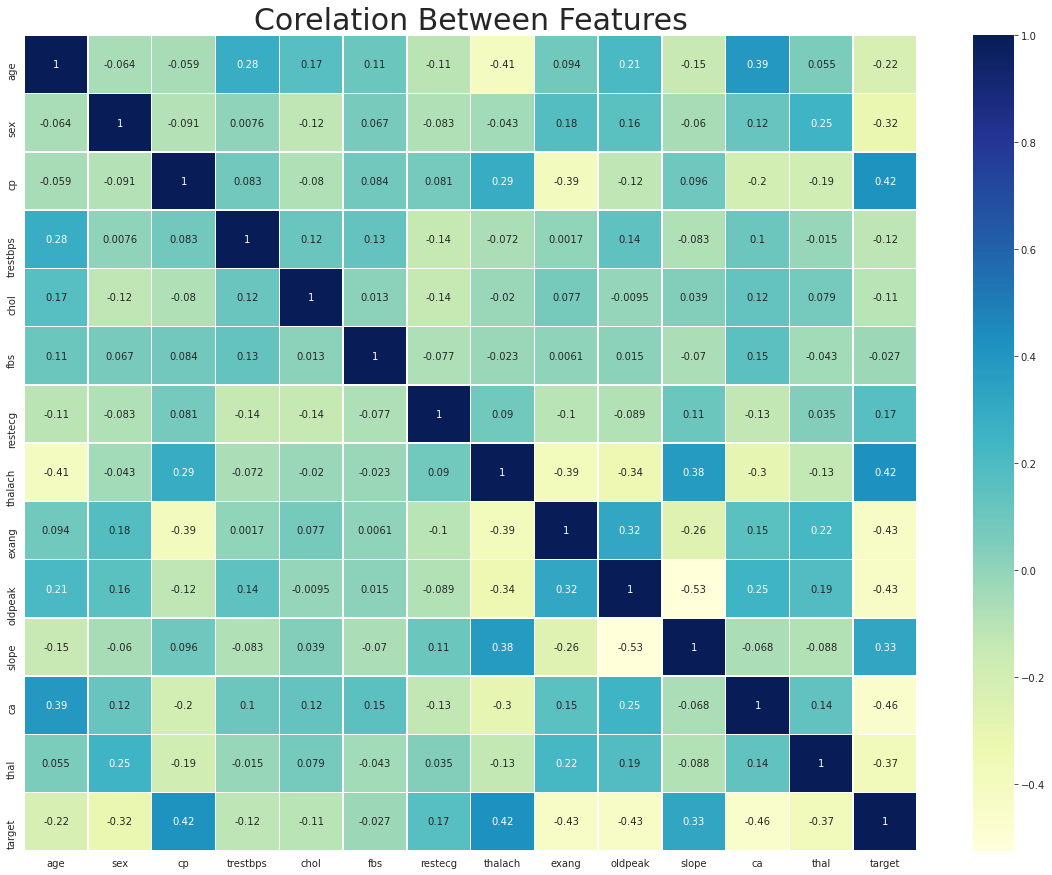

In [48]:
plt.rcParams['figure.figsize'] = (20, 15) 
sns.heatmap(df.corr(), annot = True, linewidths=.5, cmap="YlGnBu")
plt.title('Corelation Between Features', fontsize = 30)
plt.show()

Clearly :
> * 'cp', 'thalach', 'slope' shows good amount of positive correlation with our target
> * 'exang', 'oldpeak', 'ca', 'thal', 'sex', 'age' shows good amount of negative correlation with our target
> * 'fbs' being the lowest, 'chol', 'trestbps', 'restecg' carries low correlation with our target

Dropping 'fbs', 'chol', 'trestbps', 'restecg' ..

In [49]:
X = df.drop(['fbs', 'chol', 'trestbps', 'restecg', 'target'], axis =1)
Y = df['target']

## One-Hot Encoding

Always a good idea to handle your categorial features <br>
In the process, we'll be encoding 'cp', 'ca', 'thal', 'slope'


In [50]:
encoded_cp = pd.get_dummies(df['cp'], prefix = "cp")
encoded_ca = pd.get_dummies(df['ca'], prefix = "ca")
encoded_thal = pd.get_dummies(df['thal'], prefix = "thal")
encoded_slope = pd.get_dummies(df['slope'], prefix = "slope")

In [51]:
X = pd.concat([X,encoded_cp, encoded_ca, encoded_thal, encoded_slope], axis = 1)
X = X.drop(columns = ['cp', 'ca', 'thal', 'slope'], axis = 1)
X.head()

,age,sex,thalach,exang,oldpeak,cp_0,cp_1,cp_2,cp_3,ca_0,ca_1,ca_2,ca_3,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,150,0,2.3,0,0,0,1,1,0,0,0,1,0,0,1,0,0
1,37,1,187,0,3.5,0,0,1,0,1,0,0,0,0,1,0,1,0,0
2,41,0,172,0,1.4,0,1,0,0,1,0,0,0,0,1,0,0,0,1
3,56,1,178,0,0.8,0,1,0,0,1,0,0,0,0,1,0,0,0,1
4,57,0,163,1,0.6,1,0,0,0,1,0,0,0,0,1,0,0,0,1


In [52]:
Y.value_counts()

1    158
0    125
Name: target, dtype: int64

## Feature Scaling

<img  src="https://miro.medium.com/max/1400/1*CpKFmbqZdjgC5B7eCFUnkw.jpeg" alt="FDR" width="600" height="400"/>


We have multiple feature with various scales. We don't want our model to give priority to smaller / bigger values just because of difference in scale. <br>
Hence, Feature Scaling is performed during the data pre-processing to handle highly varying magnitudes or values or units

Again We'll be using StandardScaler

<img  src="https://miro.medium.com/max/992/1*dZlwWGNhFco5bmpfwYyLCQ.png" alt="FDR" width="600" height="400"/>
<br>
i.e Mean as 0 and Standard Deviation as 1

In [53]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
standard_X = scaler.fit_transform(X)


Now, Our Data looks like this :

In [54]:
pd.DataFrame(standard_X, columns = X.columns).head()

,age,sex,thalach,exang,oldpeak,cp_0,cp_1,cp_2,cp_3,ca_0,ca_1,ca_2,ca_3,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,0.982275,0.655204,0.001716,-0.682877,1.315709,-0.921777,-0.457604,-0.638718,3.444363,0.821314,-0.53513,-0.375671,-0.244796,3.955636,-1.148770,-0.768041,4.085034,-0.921777,-0.968688
1,-1.871092,0.655204,1.635162,-0.682877,2.486915,-0.921777,-0.457604,1.565637,-0.290329,0.821314,-0.53513,-0.375671,-0.244796,-0.252804,0.870496,-0.768041,4.085034,-0.921777,-0.968688
2,-1.432112,-1.526241,0.972954,-0.682877,0.437305,-0.921777,2.185294,-0.638718,-0.290329,0.821314,-0.53513,-0.375671,-0.244796,-0.252804,0.870496,-0.768041,-0.244796,-0.921777,1.032324
3,0.214061,0.655204,1.237837,-0.682877,-0.148297,-0.921777,2.185294,-0.638718,-0.290329,0.821314,-0.53513,-0.375671,-0.244796,-0.252804,0.870496,-0.768041,-0.244796,-0.921777,1.032324
4,0.323805,-1.526241,0.575629,1.464392,-0.343498,1.084861,-0.457604,-0.638718,-0.290329,0.821314,-0.53513,-0.375671,-0.244796,-0.252804,0.870496,-0.768041,-0.244796,-0.921777,1.032324


# Modeling

<img  src="https://i.imgflip.com/2ymba8.png" alt="FDR" width="600" height="400"/>


First of all, it's time for a classical split...

In [55]:
X_train, X_test, y_train, y_test = train_test_split(standard_X,Y,test_size = 0.2,random_state=43, shuffle = True)

We'll be training few models and then select the best model for our use case <br>
Models will be hypertuned via GridSearchCV because : 

<img  src="https://miro.medium.com/max/612/1*iUkbA8Dlj-5B0S8u0oRNbQ.png" alt="FDR" width="600" height="400"/>


Commenting out Hypertuning part to save time. <br>Feel free to uncomment and tune some paramteres by yourself. Who knows you may find better results than mine ;)

## K-Nearest Neighbors

> * Datapoint is classified by a plurality vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors

<img  src="http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1531424125/KNN_final1_ibdm8a.png" alt="FDR" width="600" height="400"/>




In [56]:
params = {'n_neighbors':list(range(0, 101)),
          'weights':['uniform', 'distance'],
          'p':[1,2]}

> * n_neighbors :> That's our 'K'
> * weights :> Uniform gives same weight to all points while in Distance, closer neighbors of a query point will have a greater influence than neighbors which are further away
> * p:> if 1, use manhattan_distance to calculate distance , if 2 use euclidean_distance

In [57]:
"""knn = KNeighborsClassifier()
knn_grid_cv = GridSearchCV(knn, param_grid=params, cv=5) 
knn_grid_cv.fit(X_train, y_train)
print("Best Hyper Parameters:\n",knn_grid_cv.best_params_)"""

print("Best Hyper Parameters: {'n_neighbors': 22, 'p': 2, 'weights': 'uniform'}")

Best Hyper Parameters: {'n_neighbors': 22, 'p': 2, 'weights': 'uniform'}


In [58]:
knn = KNeighborsClassifier(n_neighbors = 22, p=2, weights = 'uniform') 
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=22, p=2,
                     weights='uniform')

## Random Forest

> * Consist of combination of Multiple Decision Trees
> * Each individual tree in the random forest spits out a class prediction and the class with the most votes becomes our model’s prediction
> * Based on Bagging Technique

<img  src="https://static.javatpoint.com/tutorial/machine-learning/images/random-forest-algorithm2.png" alt="FDR" width="600" height="400"/>


In [59]:
params = { 
    'n_estimators': [300, 400, 500,600, 600, 700, 800, 900, 1000],
    'max_depth' : [2,3,4,5,6,7, 8],
    'criterion' : ['entropy','gini']
}

> * n_estimators :> No of Decision Trees to be used
> * max_depth :> Depth of Each Tree
> * criterion :> Measure the quality of a split

In [60]:
"""rfc_gridcv = RandomForestClassifier(random_state=42)
rfc_gridcv = GridSearchCV(estimator=rfc_gridcv, param_grid=params, cv= 5)
rfc_gridcv.fit(X_train, y_train)
print("Best Hyper Parameters:\n",rfc_gridcv.best_params_)"""
print("Best Hyper Parameters: {'criterion': 'gini', 'max_depth': 2, 'n_estimators': 1000}")

Best Hyper Parameters: {'criterion': 'gini', 'max_depth': 2, 'n_estimators': 1000}


In [61]:
rfc = RandomForestClassifier(random_state=42, n_estimators=1000, max_depth= 2, criterion = 'gini')
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

## Logistic Regression

> * Uses a Logistic Function to Model a Categorical Dependent variable

<img  src="https://miro.medium.com/max/2400/1*RqXFpiNGwdiKBWyLJc_E7g.png" alt="FDR" width="600" height="400"/>


In [62]:
params_for_l1 = { 
    'C' :  np.logspace(0, 4, 10),
    'solver' : ['liblinear', 'saga']
}

params_for_l2 = { 
    'C' :  np.logspace(0, 4, 10),
    'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

params_for_elasticnet = { 
    'C' :  np.logspace(0, 4, 10),
    'l1_ratio' : np.arange (0.1, 1.0, 0.1),
    'solver' : ['saga']
}

> * C :> Defines Strength of regularization ( smaller values specify stronger regularization )
> * penalty :> Used to specify the norm used in the penalization
> * solver :> Algorithm to use in the optimization problem. Different Solver supports different penalty. Hence we cane 3 cases here
> * l1_ratio :> Combination of L1 and L2(l1_ratio=0 means l2 and l1_ratio=1 means l1

In [63]:
logreg_with_l1_gridcv = LogisticRegression(penalty = 'l1')
logreg_with_l1_gridcv = GridSearchCV(estimator=logreg_with_l1_gridcv, param_grid=params_for_l1, cv= 5)
logreg_with_l1_gridcv.fit(X_train, y_train)
print("Best Hyper Parameters:\n",logreg_with_l1_gridcv.best_params_)

Best Hyper Parameters:
 {'C': 1.0, 'solver': 'liblinear'}


In [64]:
logreg_with_l1 = LogisticRegression(penalty = 'l1', C = 1, solver = 'liblinear')
logreg_with_l1.fit(X_train, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [65]:
logreg_with_l2_gridcv = LogisticRegression(penalty = 'l2')
logreg_with_l2_gridcv = GridSearchCV(estimator=logreg_with_l2_gridcv, param_grid=params_for_l2, cv= 5)
logreg_with_l2_gridcv.fit(X_train, y_train)
print("Best Hyper Parameters:\n",logreg_with_l2_gridcv.best_params_)

Best Hyper Parameters:
 {'C': 1.0, 'solver': 'newton-cg'}


In [66]:
logreg_with_l2_gridcv = LogisticRegression(penalty = 'l2', C = 1, solver = 'newton-cg')
logreg_with_l2_gridcv.fit(X_train, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [67]:
logreg_with_elasticnet_gridcv = LogisticRegression(penalty = 'elasticnet')
logreg_with_elasticnet_gridcv = GridSearchCV(estimator=logreg_with_elasticnet_gridcv, param_grid=params_for_elasticnet, cv= 5)
logreg_with_elasticnet_gridcv.fit(X_train, y_train)
print("Best Hyper Parameters:\n",logreg_with_elasticnet_gridcv.best_params_)

Best Hyper Parameters:
 {'C': 1.0, 'l1_ratio': 0.5, 'solver': 'saga'}


In [68]:
logreg_with_elasticnet_gridcv = LogisticRegression(penalty = 'elasticnet', C = 1, solver = 'saga', l1_ratio = 0.5)
logreg_with_elasticnet_gridcv.fit(X_train, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=0.5, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='elasticnet',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

# Model Evaluation

Time to evaluate to find the best model for our use-case

<img  src="https://im.indiatimes.in/content/2018/Mar/_1521531221.jpg" alt="FDR" width="600" height="400"/>



We'll be using :
> * cross_val_score :> Evaluate a Score by Cross-Validation
> * classification_report :> Text Report showing the Main Classification Metrics. We'll gonna draw Confussion Matrix too

If you are wondering what's Cross - Validation is the it's :

<img  src="https://scikit-learn.org/stable/_images/grid_search_cross_validation.png" alt="FDR" width="600" height="400"/>

Basically, dataset is divided in k equal parts. Then one of that part is used as test part and other for training. <br>
And this step is repeated until every K-fold serve as the test set.

## But Why Not Evaluate on Test Set from train_test_split ?

> * In train_test_split, we get our accuracy according to the split of the data
> * If we change re-split in different order, then we'll get another new accuracy

Wait wait ! Let me give you an example ..

Right Now, We have a split with random state as 43 <br>
Let's take KNN for our example

In [69]:
knn.score(X_test, y_test)

0.8421052631578947

Now, Let's change our random_state as 0 and notice the difference..

In [70]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(standard_X,Y,test_size = 0.2,random_state=0, shuffle = True)

In [71]:
knn1 = KNeighborsClassifier(n_neighbors = 22, p=2, weights = 'uniform') 
knn1.fit(X_train1, y_train1)
knn1.score(X_test1, y_test1)

0.8771929824561403

<img  src="http://www.quickmeme.com/img/a6/a6ec1cbce3a2b0f01dcdc59ad5f3d5fa7c03c817bcebc49dc570ec6e5dad48a2.jpg" alt="FDR" width="600" height="400"/>


## Evaluation for KNN

In [72]:
scores = cross_val_score(knn, X_train, y_train, cv=5)
print('KNN Model gives an average accuracy of {0:.2f} % with minimun of {1:.2f} % and maximum of {2:.2f} % accuracy'.format(scores.mean() * 100, scores.min() * 100, scores.max() * 100))

KNN Model gives an average accuracy of 86.29 % with minimun of 84.44 % and maximum of 91.11 % accuracy


In [73]:
Y_hat = knn.predict(X_test)
print(classification_report(y_test, Y_hat))

              precision    recall  f1-score   support

           0       0.73      0.84      0.78        19
           1       0.91      0.84      0.88        38

    accuracy                           0.84        57
   macro avg       0.82      0.84      0.83        57
weighted avg       0.85      0.84      0.84        57



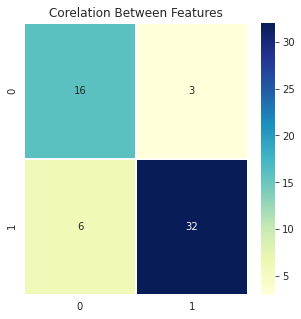

In [74]:
plt.rcParams['figure.figsize'] = (5, 5) 
sns.heatmap(confusion_matrix(y_test, Y_hat), annot = True, linewidths=.5, cmap="YlGnBu")
plt.title('Corelation Between Features')
plt.show()

In [75]:
print('True Positive Cases : {}'.format(confusion_matrix(y_test, Y_hat)[1][1]))
print('True Negative Cases : {}'.format(confusion_matrix(y_test, Y_hat)[0][0]))
print('False Positive Cases : {}'.format(confusion_matrix(y_test, Y_hat)[0][1]))
print('False Negative Cases : {}'.format(confusion_matrix(y_test, Y_hat)[1][0]))

True Positive Cases : 32
True Negative Cases : 16
False Positive Cases : 3
False Negative Cases : 6


## Evaluation for Random Forest

In [76]:
scores = cross_val_score(rfc, X_train, y_train, cv=5)
print('Random Forest Model gives an average accuracy of {0:.2f} % with minimun of {1:.2f} % and maximum of {2:.2f} % accuracy'.format(scores.mean() * 100, scores.min() * 100, scores.max() * 100))

Random Forest Model gives an average accuracy of 84.52 % with minimun of 80.00 % and maximum of 88.89 % accuracy


In [77]:
Y_hat = rfc.predict(X_test)
print(classification_report(y_test, Y_hat))

              precision    recall  f1-score   support

           0       0.71      0.79      0.75        19
           1       0.89      0.84      0.86        38

    accuracy                           0.82        57
   macro avg       0.80      0.82      0.81        57
weighted avg       0.83      0.82      0.83        57



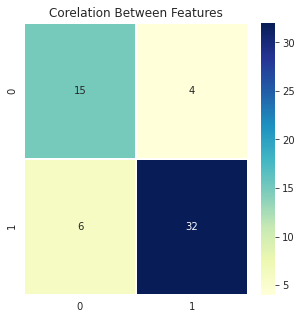

In [78]:
plt.rcParams['figure.figsize'] = (5, 5) 
sns.heatmap(confusion_matrix(y_test, Y_hat), annot = True, linewidths=.5, cmap="YlGnBu")
plt.title('Corelation Between Features')
plt.show()

In [79]:
print('True Positive Cases : {}'.format(confusion_matrix(y_test, Y_hat)[1][1]))
print('True Negative Cases : {}'.format(confusion_matrix(y_test, Y_hat)[0][0]))
print('False Positive Cases : {}'.format(confusion_matrix(y_test, Y_hat)[0][1]))
print('False Negative Cases : {}'.format(confusion_matrix(y_test, Y_hat)[1][0]))

True Positive Cases : 32
True Negative Cases : 15
False Positive Cases : 4
False Negative Cases : 6


## Evaluation for Logistic Model with L1 Penalty

In [80]:
scores = cross_val_score(logreg_with_l1, X_train, y_train, cv=5)
print('Logistic Model with L1 Penalty gives an average accuracy of {0:.2f} % with minimun of {1:.2f} % and maximum of {2:.2f} % accuracy'.format(scores.mean() * 100, scores.min() * 100, scores.max() * 100))

Logistic Model with L1 Penalty gives an average accuracy of 83.62 % with minimun of 80.00 % and maximum of 84.78 % accuracy


In [81]:
Y_hat = logreg_with_l1.predict(X_test)
print(classification_report(y_test, Y_hat))

              precision    recall  f1-score   support

           0       0.70      0.84      0.76        19
           1       0.91      0.82      0.86        38

    accuracy                           0.82        57
   macro avg       0.80      0.83      0.81        57
weighted avg       0.84      0.82      0.83        57



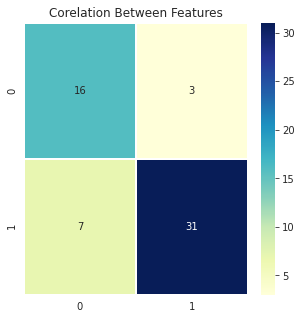

In [82]:
plt.rcParams['figure.figsize'] = (5, 5) 
sns.heatmap(confusion_matrix(y_test, Y_hat), annot = True, linewidths=.5, cmap="YlGnBu")
plt.title('Corelation Between Features')
plt.show()

In [83]:
print('True Positive Cases : {}'.format(confusion_matrix(y_test, Y_hat)[1][1]))
print('True Negative Cases : {}'.format(confusion_matrix(y_test, Y_hat)[0][0]))
print('False Positive Cases : {}'.format(confusion_matrix(y_test, Y_hat)[0][1]))
print('False Negative Cases : {}'.format(confusion_matrix(y_test, Y_hat)[1][0]))

True Positive Cases : 31
True Negative Cases : 16
False Positive Cases : 3
False Negative Cases : 7


## Evaluation for Logistic Model with L2 Penalty

In [84]:
scores = cross_val_score(logreg_with_l2_gridcv, X_train, y_train, cv=5)
print('Logistic Model with L2 Penalty gives an average accuracy of {0:.2f} % with minimun of {1:.2f} % and maximum of {2:.2f} % accuracy'.format(scores.mean() * 100, scores.min() * 100, scores.max() * 100))

Logistic Model with L2 Penalty gives an average accuracy of 83.18 % with minimun of 82.22 % and maximum of 84.78 % accuracy


In [85]:
Y_hat = logreg_with_l2_gridcv.predict(X_test)
print(classification_report(y_test, Y_hat))

              precision    recall  f1-score   support

           0       0.70      0.84      0.76        19
           1       0.91      0.82      0.86        38

    accuracy                           0.82        57
   macro avg       0.80      0.83      0.81        57
weighted avg       0.84      0.82      0.83        57



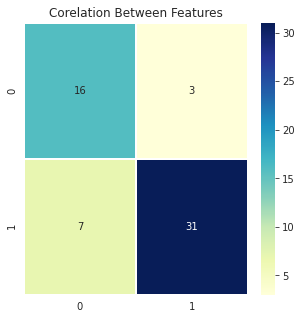

In [86]:
plt.rcParams['figure.figsize'] = (5, 5) 
sns.heatmap(confusion_matrix(y_test, Y_hat), annot = True, linewidths=.5, cmap="YlGnBu")
plt.title('Corelation Between Features')
plt.show()

In [87]:
print('True Positive Cases : {}'.format(confusion_matrix(y_test, Y_hat)[1][1]))
print('True Negative Cases : {}'.format(confusion_matrix(y_test, Y_hat)[0][0]))
print('False Positive Cases : {}'.format(confusion_matrix(y_test, Y_hat)[0][1]))
print('False Negative Cases : {}'.format(confusion_matrix(y_test, Y_hat)[1][0]))

True Positive Cases : 31
True Negative Cases : 16
False Positive Cases : 3
False Negative Cases : 7


## Evaluation for Logistic Model with Elasticnet Penalty

In [88]:
scores = cross_val_score(logreg_with_elasticnet_gridcv, X_train, y_train, cv=5)
print('Logistic Model with L2 Penalty gives an average accuracy of {0:.2f} % with minimun of {1:.2f} % and maximum of {2:.2f} % accuracy'.format(scores.mean() * 100, scores.min() * 100, scores.max() * 100))

Logistic Model with L2 Penalty gives an average accuracy of 83.62 % with minimun of 80.00 % and maximum of 84.78 % accuracy


In [89]:
Y_hat = logreg_with_elasticnet_gridcv.predict(X_test)
print(classification_report(y_test, Y_hat))

              precision    recall  f1-score   support

           0       0.70      0.84      0.76        19
           1       0.91      0.82      0.86        38

    accuracy                           0.82        57
   macro avg       0.80      0.83      0.81        57
weighted avg       0.84      0.82      0.83        57



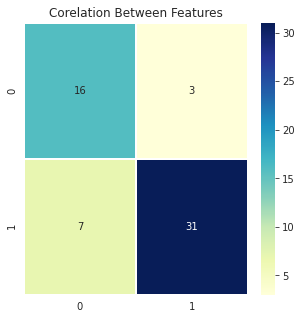

In [90]:
plt.rcParams['figure.figsize'] = (5, 5) 
sns.heatmap(confusion_matrix(y_test, Y_hat), annot = True, linewidths=.5, cmap="YlGnBu")
plt.title('Corelation Between Features')
plt.show()

In [91]:
print('True Positive Cases : {}'.format(confusion_matrix(y_test, Y_hat)[1][1]))
print('True Negative Cases : {}'.format(confusion_matrix(y_test, Y_hat)[0][0]))
print('False Positive Cases : {}'.format(confusion_matrix(y_test, Y_hat)[0][1]))
print('False Negative Cases : {}'.format(confusion_matrix(y_test, Y_hat)[1][0]))

True Positive Cases : 31
True Negative Cases : 16
False Positive Cases : 3
False Negative Cases : 7


# Conclusion

> * In Disease Detection We can't jeopardy with that person's life by predicting No Heart Disease to a patient with Heart Disease. 
> * We need to have a model with better accuracy and low False Negative Cases
> * We trained KNN, RandomForest and Logistic Regression with different penality with Logistic Regression having slight advantage
## With a Better Accuracy and Lower False Negative Case, Logistic Regression is our clear Winner


# End Notes
> * With this We end another analysis on Heart Disease related Dataset. 
> * Feel free to check out my [Previous Kernel](https://www.kaggle.com/rahulgulia/data-science-and-cardiovascular-diseases-cvds) based on similar kind of Dataset

> * It was fun to analyise this data. Seems I'm starting loving Medical Datasets. There was alot of learning opportunity and yea came accross to quite "Data Science Friendly Memes" :D  <br>




## If You like these types of Kernals (DataScience + Memes) then don't forget to Upvote this Kernel. It'll boost my morale, encouraging me to create more similar kinds of Kernels.  <br>


## And Yeah, I'm always open for learning. If you want to correct something, advice, wanna share new strageties or techniques then feel free to comment them out. I'll love to hear some great advices / feedback from the community.